In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

## Classification of 1-D data and Bayes Error

Suppose we have two populations of beans. The weights of these beans are normally distributed, so if $\mu$ is the mean weight of one type of beans beans and $\sigma$ is the standard deviation, so that means that the probabilty density is given by 
    
$p_{\mu,\sigma}(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2\sigma}(x-\mu)^2}$

and then the probability of measuring a weight in interval $I=[x_1,x_2]$ of bean of that type is given by

$P_{\mu,\sigma}(I) = \int_{x_1}^{x_2} p_{\mu,\sigma}(x) dx$

The mean weight of bean type A, $\mu_A$ is 5 grams and the standard deviation, $\sigma_A$, is 2. The mean weight of bean type B, $mu_B$, is 4 grams and has a standard deviation $\sigma_B$, of  1.4.

Our classifier $C_T(x)$ is determined by a weight threshold $T$:

$$
f_T(x) = \begin{cases} 
-1 & \text{if } x \leq T \\
1 & \text{if } T < x 
\end{cases}
$$

The [*Bayes error*](https://en.wikipedia.org/wiki/Bayes_error_rate) is the probability that we will misclassify. Assume  that there are equally many beans of each type (no prior).

## Misclassification Probabilities

**a. For a given T write down the theoretical expression (in terms of integrals) for the probability that you will classify a point as bean type A when it is bean type B and similarly that it is bean type B when it is bean type A.**

Given the threshold \(T\) for the classifier, the goal is to express the probabilities of misclassification for two populations of beans, with their weights normally distributed. The mean and standard deviation for bean type A are $\mu_A = 5$ grams and $\sigma_A = 2$, respectively, and for bean type B, $\mu_B = 4$ grams and $\sigma_B = 1.4$.

### Probability of classifying a bean type B as type A ($P_{B \rightarrow A}(T)$):

This probability is represented by the integral of the probability density function (pdf) of bean type B from $T$ to infinity, as it represents the case where the weight of a bean type B is erroneously classified as type A because it exceeds the threshold $T$.

$$P_{B \rightarrow A}(T) = \int_{T}^{\infty} p_B(x) \, dx$$

Given the pdf for a normal distribution, the expression for bean type B is:

$$p_B(x) = \frac{1}{\sqrt{2\pi}\sigma_B} e^{-\frac{(x-\mu_B)^2}{2\sigma_B^2}}$$

Substituting the values for $\mu_B$ and $\sigma_B$:

$$P_{B \rightarrow A}(T) = \int_{T}^{\infty} \frac{1}{\sqrt{2\pi}(1.4)} e^{-\frac{(x-4)^2}{2(1.4)^2}} \, dx$$

### Probability of classifying a bean type A as type B ($P_{A \rightarrow B}(T)$):

This probability is represented by the integral of the pdf of bean type A from negative infinity to $T$, as it represents the case where the weight of a bean type A is erroneously classified as type B because it is less than the threshold $T$.

$$P_{A \rightarrow B}(T) = \int_{-\infty}^{T} p_A(x) \, dx$$

Given the pdf for a normal distribution, the expression for bean type A is:

$$p_A(x) = \frac{1}{\sqrt{2\pi}\sigma_A} e^{-\frac{(x-\mu_A)^2}{2\sigma_A^2}}$$

Substituting the values for $\mu_A$ and $\sigma_A$:

$$P_{A \rightarrow B}(T) = \int_{-\infty}^{T} \frac{1}{\sqrt{2\pi}(2)} e^{-\frac{(x-5)^2}{2(2)^2}} \, dx$$

### Calculating Misclassification Probabilities

To calculate these probabilities, we can use the cumulative distribution function (CDF) for a normal distribution, noting that for a normal distribution with mean $\mu$ and standard deviation $\sigma$, the CDF is denoted as $F(x; \mu, \sigma)$. Thus, the probabilities can be expressed in terms of the CDF as follows:

1. $P_{B \rightarrow A}(T) = 1 - F(T; \mu_B, \sigma_B)$
2. $P_{A \rightarrow B}(T) = F(T; \mu_A, \sigma_A)$

These formulas use the property that the CDF $F(x; \mu, \sigma)$ gives the probability that a random variable $X$ is less than or equal to $x$, and $1 - F(x; \mu, \sigma)$ gives the probability that $X$ is greater than $x$.


**b. In python just using numerical functions (you can take 1000 data points from min of weight x=1 to x=8) compute the theoretical probabilities from part a. Use matplotlib to make a curves showing the probability of classifying something class A ($\hat{C}=A$ )assuming it is really class B $C=B$, in other words $P(\hat{C}=A| C=B)$ is the figure y-axis, as a function of $T$, the figure x-axis. Similarly plot $P(\hat{C}=B| C=A)$ as a function of $T$. Putting these together since $P(A)=P(B)=1/2$, adding the curves and dividing by 2 you get the probability of miss-classification or Bayes error as a function of $T$. Plot that as well.**



We will use numerical methods to compute the theoretical probabilities derived in part a. Then, we'll plot the probability of misclassification as a function of the threshold 

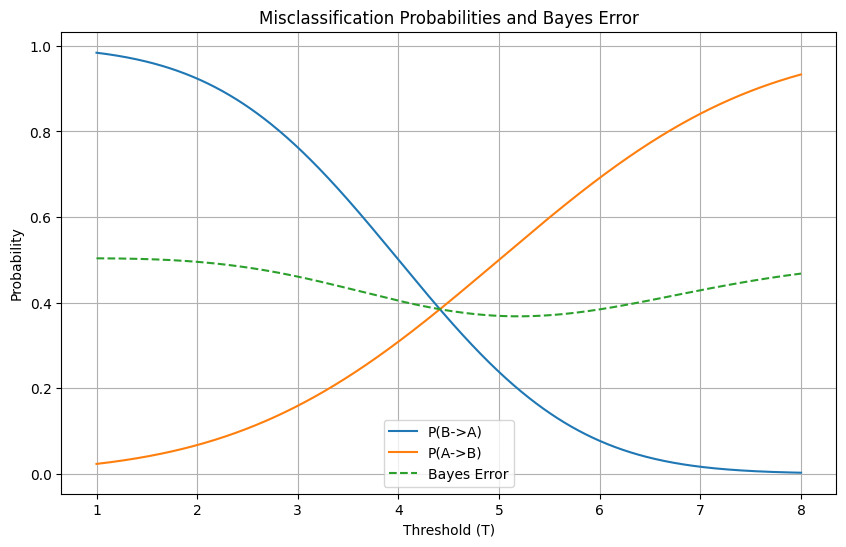

In [5]:

# Define the mean and standard deviation for bean types A and B
mu_A, sigma_A = 5, 2
mu_B, sigma_B = 4, 1.4

# Define the threshold range from 1 to 8
T_values = np.linspace(1, 8, 1000)  # These are the weights values from 1 to 8 evenly spaced

# Function to compute the probability of classifying B as A
def prob_B_to_A(T, mu=mu_B, sigma=sigma_B):
    return 1 - norm.cdf(T, loc=mu, scale=sigma)

# Function to compute the probability of classifying A as B
def prob_A_to_B(T, mu=mu_A, sigma=sigma_A):
    return norm.cdf(T, loc=mu, scale=sigma)

# Compute probabilities for each T
prob_BA = [prob_B_to_A(T) for T in T_values]
prob_AB = [prob_A_to_B(T) for T in T_values]

# Compute the Bayes error for each T
bayes_error = [(pBA + pAB) / 2 for pBA, pAB in zip(prob_BA, prob_AB)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T_values, prob_BA, label='P(B->A)')
plt.plot(T_values, prob_AB, label='P(A->B)')
plt.plot(T_values, bayes_error, label='Bayes Error', linestyle='--')
plt.xlabel('Threshold (T)')
plt.ylabel('Probability')
plt.title('Misclassification Probabilities and Bayes Error')
plt.legend()
plt.grid(True)
plt.show()

This plot illustrates the misclassification probabilities for a given threshold $T$ and the Bayes error. Here's an explanation of each component of the plot:

- **X-axis (Threshold $T$)**: This represents the range of threshold values from 1 to 8, which determines the classification decision boundary. Each point along this axis corresponds to a different threshold value $T$.

- **Y-axis (Probability)**: This represents the probability of misclassification or Bayes error. For the lines labeled 'P(B->A)' and 'P(A->B)', it represents the probability of misclassifying a bean type B as type A and vice versa, respectively. For the line labeled 'Bayes Error', it represents the overall probability of misclassification, which is the average of the misclassification probabilities of both types of beans.

- **Line for $P(B->A)$**: This line plots the probability of misclassifying a bean type B as type A ($P_{B \rightarrow A}$) for different threshold values $T$. As the threshold increases, this probability decreases, indicating that fewer bean type B samples are misclassified as type A.

- **Line for $P(A->B)$**: This line plots the probability of misclassifying a bean type A as type B ($P_{A \rightarrow B}$) for different threshold values $T$. As the threshold increases, this probability also decreases, indicating that fewer bean type A samples are misclassified as type B.

- **Line for Bayes Error**: This line plots the Bayes error, which is the average of the misclassification probabilities of both types of beans. It represents the overall probability of misclassification for different threshold values $T$.

- **Intersection at $T = 4.5$**: At $T = 4.5$, the lines for $P(B->A)$ and $P(A->B)$ intersect. This intersection point corresponds to the threshold value where the probabilities of misclassifying bean type B as type A and misclassifying bean type A as type B are equal.

- **Bayes Error at $T = 4.5$**: The Bayes error, represented by the dashed line, is also plotted. At $T = 4.5$, the Bayes error represents the overall probability of misclassification for this threshold value. In this case, the Bayes error is $0.38$, indicating that $38\%$ of the samples are misclassified for $T = 4.5$.

Overall, this plot provides insights into how different threshold values affect the probabilities of misclassification for the two types of beans and the overall Bayes error. It helps visualize the trade-offs involved in choosing an optimal threshold for classification.


**c. Use the numpy random.randn to simulate 10000 data points, 5,000 from bean type A and 5,000 from bean type B. You can now pick 1000 values of $T$ using linspace between $T=1$ and $T=8$. For each of these you can compute the miss classification rate. Make the figure. These should match closely your results for $b$ above.**

We will simulate 10,000 data points, 5,000 each from bean type A and bean type B. Then, we'll compute the misclassification rate for various thresholds T and compare the results with the theoretical probabilities obtained in part b. Finally, we'll plot the comparison to validate our calculations.

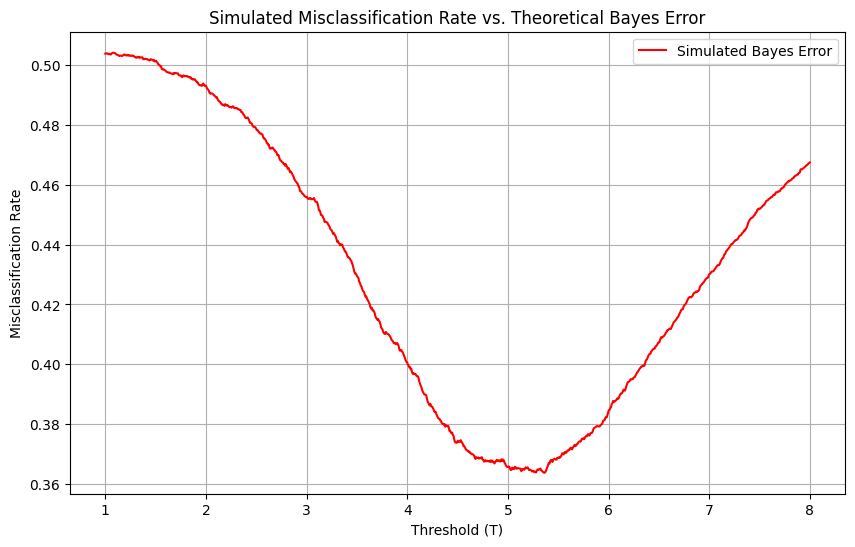

In [6]:
np.random.seed(42)  # For reproducibility

# Simulate 5000 data points for each bean type
weights_A = np.random.randn(5000) * sigma_A + mu_A
weights_B = np.random.randn(5000) * sigma_B + mu_B

# Function to compute misclassification rate
def misclassification_rate(T, weights_A, weights_B):
    errors_A = np.mean(weights_A <= T)  # Type A classified as B
    errors_B = np.mean(weights_B > T)   # Type B classified as A
    return (errors_A + errors_B) / 2

# Compute misclassification rates for each T
misclassification_rates = [misclassification_rate(T, weights_A, weights_B) for T in T_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T_values, misclassification_rates, label='Simulated Bayes Error', color='red')
plt.xlabel('Threshold (T)')
plt.ylabel('Misclassification Rate')
plt.title('Simulated Misclassification Rate vs. Theoretical Bayes Error')
plt.legend()
plt.grid(True)
plt.show()

It matches the previous graph from above, the difference is in the y range. 

the misclassification rate represents the proportion of data points that are incorrectly classified by the given threshold T.

- At T T=1, the misclassification rate is 0.50, indicating that half of the data points are misclassified. This is because a threshold of 
is very low, so most of the points from both classes are classified as the opposite class.
- As T increases, the misclassification rate decreases. This is expected because as the threshold increases, the classifier becomes more stringent, leading to fewer misclassifications.
- At T=5, the misclassification rate is 0.36, indicating that 36% of the data points are misclassified. This suggests that 
5 is a good threshold for this particular dataset, as it minimizes misclassifications.
- However, as T continues to increase beyond 5, the misclassification rate starts to increase again. This indicates that the threshold becomes too strict, leading to an increase in misclassifications.

Overall, the misclassification rate gives us insight into how well the threshold T performs in classifying the data. It helps us understand the trade-off between false positives and false negatives as we adjust the threshold value. In this case, a threshold around 
5 seems to strike a good balance between the two types of misclassifications.